# Assignment 2: K-means clustering {-}

This assignment aims at familiarizing you with training and testing K-means clustering model. You will have to:

- Load the data.
- Analyze the data.
- Use Elbow method to determine the number of clusters K. Research the use of parameters of KElbowVisualizer function.
- Train a K-means clustering model.
- Perform cluster visualization in two ways:
  - Apply PCA to perform dimensionality reduction: project data features into a three-dimensional space and two-dimensional space and visualize the clusters.
  - Visualize the clusters using T-distributed Stochastic Neighbor Embedding (T-SNE). T-SNE is a tool for visualizing high-dimensional data. T-SNE, based on stochastic neighbor embedding, is a nonlinear dimensionality reduction technique to visualize data in a two or three dimensional space. Refernece: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
- Take some samples from each cluster and analyze their features to see the clusters' characteristics.


The dataset you will be working on is 'credit-card-holder-data.csv'. It is composed of attributes such as balance of the credit card, ammount of purchase, etc., to develop a customer segmentation model.

### Submission {-}
The structure of submission folder should be organized as follows:

- ./\<StudentID>-assignment2-notebook.ipynb: Jupyter notebook containing source code.

The submission folder is named ML4DS-\<StudentID>-Assignment2 (e.g., ML4DS-2012345-Assigment2) and then compressed with the same name.
    
### Evaluation {-}
Assignment evaluation will be conducted on how properly you handle the data for training the K-means model, evaluate the model performance, visualize customer clusters and analyze the cluster characteristics. In addition, your code should conform to a Python coding convention such as PEP-8.

### Deadline {-}
Please visit Canvas for details.

In [1]:
# Load pandas library
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load dataset in pandas dataframe
df = pd.read_csv("credit-card-holder-data.csv")

In [3]:
# Show several 
df.head()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


This is a dataset for developing a customer segmentation. The dataset summarizes the usage behavior of active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

- BALANCE: Balance amount left in their account to make purchases.
- BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated).
- PURCHASES: Amount of purchases made from account.
- ONEOFF_PURCHASES: Maximum purchase amount done in one-go (i.e., one-time payment for a purchase).
- INSTALLMENTS_PURCHASES: Amount of purchase done in installment (i.e., multiple payments for a purchase). Observation: PURCHASES = ONEOFF_PURCHASE + INSTALLMENT_PURCHASES).
- CASH_ADVANCE: Cash in advance given by the user (a cash advance is when taking money out of the ATM using credit card instead of debit card or ATM card).
- PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased).
- ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased).
- PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done).
- CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid.
- CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advanced".
- PURCHASES_TRX: Number of purchase transactions made.
- CREDIT_LIMIT: Limit of Credit Card for user.
- PAYMENTS: Amount of payment done by user (i.e., payment for the use of credit card)
- MINIMUM_PAYMENTS: Minimum amount of payments made by user.
- PRC_FULL_PAYMENT: Percent of full payment paid by user.
- TENURE: Tenure of credit card service for user (i.e., how long (in months) you should have held the credit card before they will grant you credit).

### Data analysis

In [4]:
df.drop(columns = ['Unnamed: 0'], inplace=True)

In [5]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

No N/A value, very good. Now, I will plot the histogram of each feature

array([[<Axes: title={'center': 'BALANCE'}>,
        <Axes: title={'center': 'BALANCE_FREQUENCY'}>,
        <Axes: title={'center': 'PURCHASES'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES'}>],
       [<Axes: title={'center': 'INSTALLMENTS_PURCHASES'}>,
        <Axes: title={'center': 'CASH_ADVANCE'}>,
        <Axes: title={'center': 'PURCHASES_FREQUENCY'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<Axes: title={'center': 'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_TRX'}>,
        <Axes: title={'center': 'PURCHASES_TRX'}>],
       [<Axes: title={'center': 'CREDIT_LIMIT'}>,
        <Axes: title={'center': 'PAYMENTS'}>,
        <Axes: title={'center': 'MINIMUM_PAYMENTS'}>,
        <Axes: title={'center': 'PRC_FULL_PAYMENT'}>],
       [<Axes: title={'center': 'TENURE'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

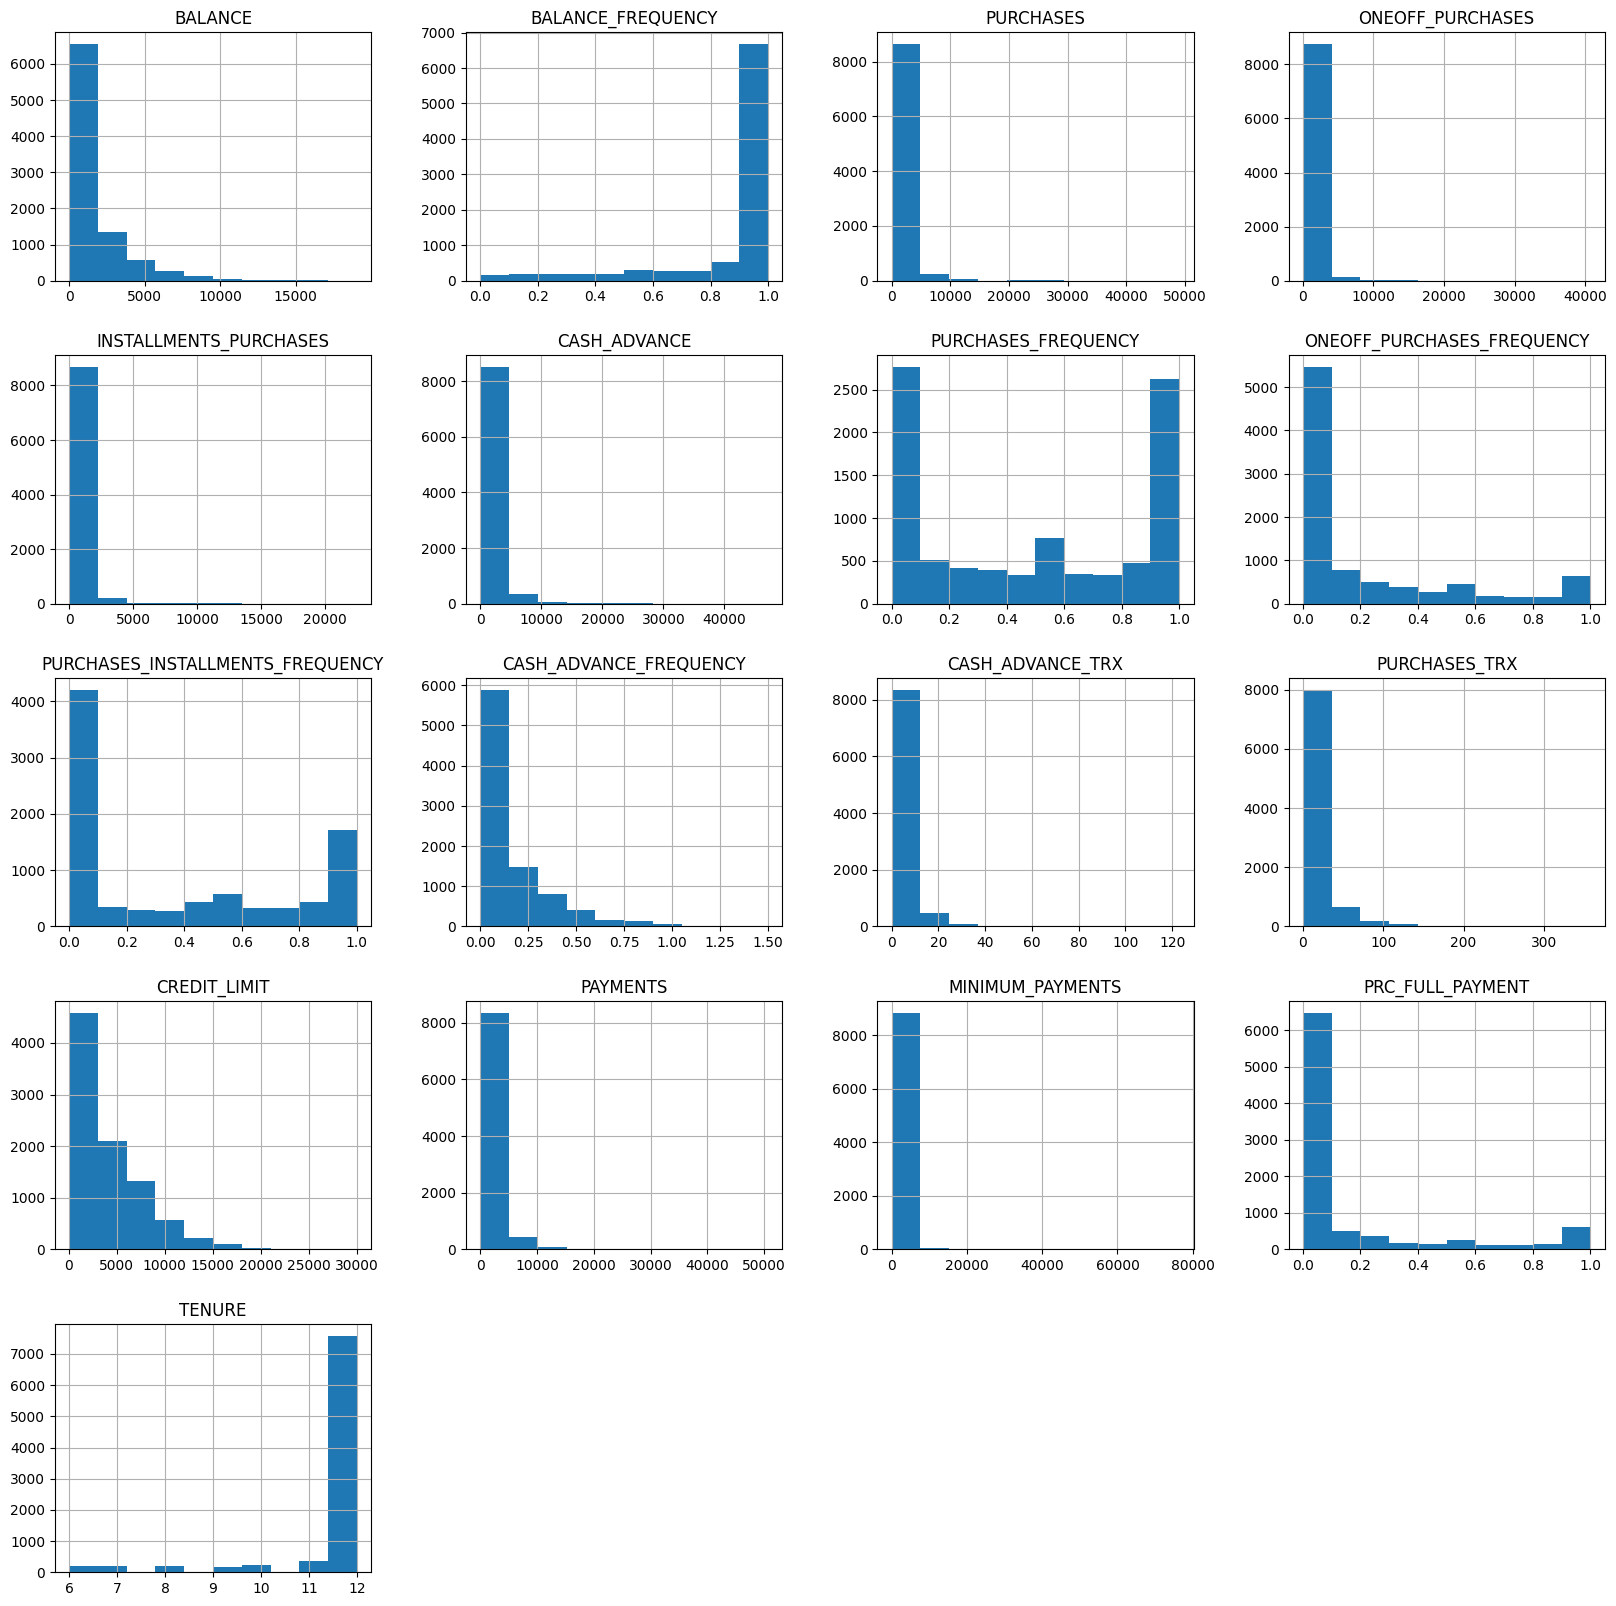

In [7]:
df.hist(figsize=(20, 20))

<Axes: >

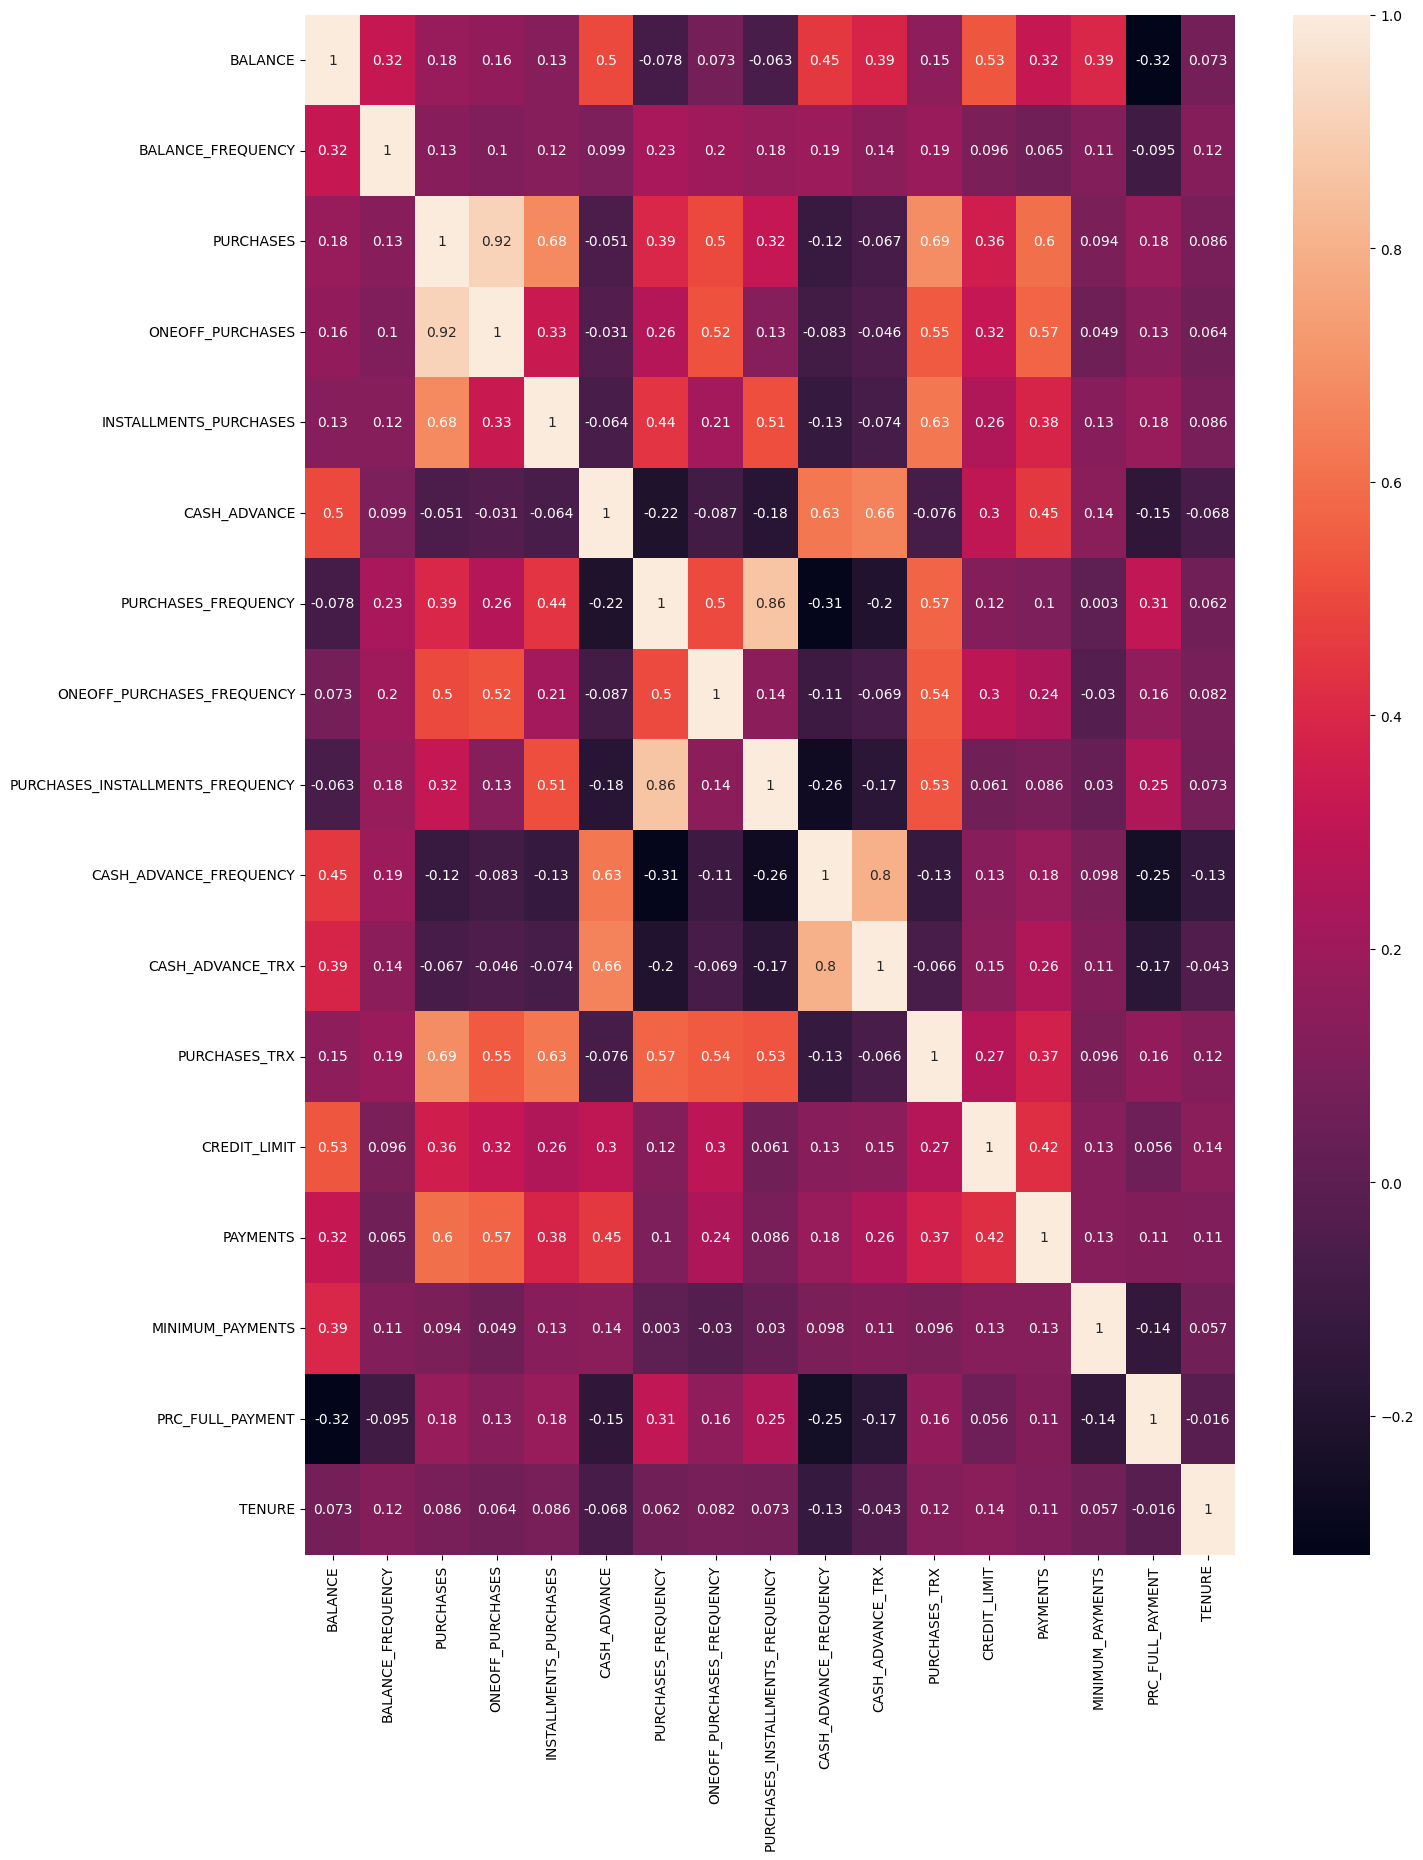

In [8]:
# Polt the correlation heatmap between pairs of features.
import seaborn as sns

plt.figure(figsize=(15,20))
sns.heatmap(df.corr(), annot=True)

# Observation: ONEOFF_PURCHASES and Purchars; PURCHASES_INSTALLMENTS_FREQUENCY and PURCHASES_FREQUENCY;
# CASH_ADVANCED_TRX and CASH__ADVANCE_FREQUENCY are positively correlated features.

The data does not follow a normal distribution, but that's OK. K-mean does not require a normal distribution to work best.

Also, the data contains no categorical features, so no encoding is needed.

### K-means clustering

In [9]:
#Firstly, scale data to have mean = 0 and std = 1 (normalize it)
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()

normal_data = normalizer.fit_transform(df.values)



In [10]:
#Import yellowbrick lib to use elbow method to find the best value for k
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

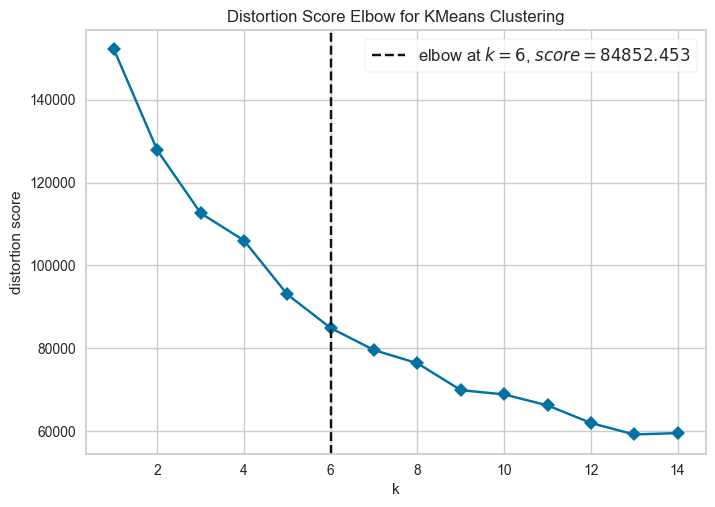

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
#According to scikit-learn docs, k-means++ is an improvement of initilization of centroids
# It bases on a probability distribution of points contribution to determine the initial centroids better and guarantees a faster convergence than 'random'
elbow_method = KElbowVisualizer(KMeans(init = 'k-means++'), k=(1,15), timings=False, locate_elbow=True)
elbow_method.fit(normal_data)
elbow_method.show()

In [12]:
#The best value for k is 6, hence we use it for our KMeans
model = KMeans(init = 'k-means++', n_clusters=elbow_method.elbow_value_)
model.fit(normal_data)

KMeans(n_clusters=6)

In [13]:
print(model.labels_) #Show the clusters of the data
print(model.cluster_centers_) #Show the centroids of each cluster

[0 4 1 ... 3 0 0]
[[-0.25050537 -0.36502902 -0.35753867 -0.2450581  -0.3950549  -0.16540082
  -0.85713196 -0.420966   -0.74756404 -0.07314641 -0.14771865 -0.49050587
  -0.33076409 -0.25739768 -0.11154527 -0.28687893 -0.0494185 ]
 [-0.15676547  0.36650219  0.41704692  0.54683078 -0.0186439  -0.33489349
   0.89770153  1.7743141   0.09001616 -0.40595833 -0.32916908  0.49154492
   0.34620655  0.06351282 -0.158516    0.36386267  0.18766685]
 [ 0.89865145  0.46856681  2.21864392  1.73022774  2.06723009 -0.17200473
   1.1606283   1.56221568  1.21116224 -0.29402248 -0.18429476  2.67512918
   1.22930006  1.27161321  0.57054118  0.28607813  0.33422853]
 [-0.42292287  0.11583454 -0.08861721 -0.2670374   0.28099437 -0.37529012
   0.93196521 -0.4383198   1.12743403 -0.48087773 -0.3689406   0.10028478
  -0.32808078 -0.26497386 -0.08321835  0.39715926 -0.0314246 ]
 [ 1.46346154  0.38159486 -0.25299584 -0.18111343 -0.2655452   1.73661707
  -0.54423399 -0.24811017 -0.47554264  1.79286963  1.67333806 -0

### PCA + TSNE dimension reduction 

In [14]:
#Import library
from sklearn.decomposition import PCA

no_components = len(df.columns)
pca = PCA(n_components=no_components)
pca.fit(normal_data)

PCA(n_components=17)

In [15]:
# Print the amount of variance carried in each principal components (eigenvalues). This is the eigen values.
print("Amount of variance carried in each principal components (eigen values) :\n" + str(pca.explained_variance_))

# Print the ratio of ammount of variance carried in each principal components (eigen values). The ratio is calculated by dividing the eigenvalue of each component by the sum of eigenvalues
print("\nRatio of variance carried in each principal components (eigen values) :\n" + str(pca.explained_variance_ratio_))

# Sum of all ratios must be 1
print("\nCummulative sum of all ratios :\n" + str(pca.explained_variance_ratio_.cumsum()))

# Note: by ranking the eigenvectors in order of their eigenvalues, highest to lowest, we get the principal components in order of significance.

Amount of variance carried in each principal components (eigen values) :
[4.63982474e+00 3.45172419e+00 1.49480352e+00 1.27173785e+00
 1.06479362e+00 9.77645154e-01 8.30922729e-01 7.23853420e-01
 6.50969490e-01 5.23659568e-01 4.03267614e-01 3.01551195e-01
 2.42530713e-01 2.06975882e-01 1.72227523e-01 4.54007901e-02
 1.16501010e-05]

Ratio of variance carried in each principal components (eigen values) :
[2.72900372e-01 2.03019913e-01 8.79197945e-02 7.47997502e-02
 6.26279204e-02 5.75021129e-02 4.88723464e-02 4.25748554e-02
 3.82880445e-02 3.08000623e-02 2.37189739e-02 1.77363237e-02
 1.42649185e-02 1.21736915e-02 1.01298988e-02 2.67033632e-03
 6.85223491e-07]

Cummulative sum of all ratios :
[0.27290037 0.47592029 0.56384008 0.63863983 0.70126775 0.75876986
 0.80764221 0.85021707 0.88850511 0.91930517 0.94302415 0.96076047
 0.97502539 0.98719908 0.99732898 0.99999931 1.        ]


In [16]:
#We choose to reduce the dimension to 3, as they cover 56.38% variance of the dataset.
#Plus, 3d is easy for us humans to examine the data

no_components = 3
pca = PCA(n_components=no_components)
pca3_data = pca.fit_transform(normal_data)
pca3_df = pd.DataFrame(pca3_data, columns=["pca_1", "pca_2", "pca_3"])


In [17]:
pca3_df

,pca_1,pca_2,pca_3
0,-1.682221,-1.076451,0.488443
1,-1.138296,2.506473,0.600957
2,0.969684,-0.383520,0.102426
3,-0.873629,0.043164,1.460024
4,-1.599434,-0.688581,0.365075
...,...,...,...
8945,-0.359629,-2.016145,-0.995324
8946,-0.564369,-1.639122,-1.290191
8947,-0.926203,-1.810785,-0.474692
8948,-2.336551,-0.657965,0.974801


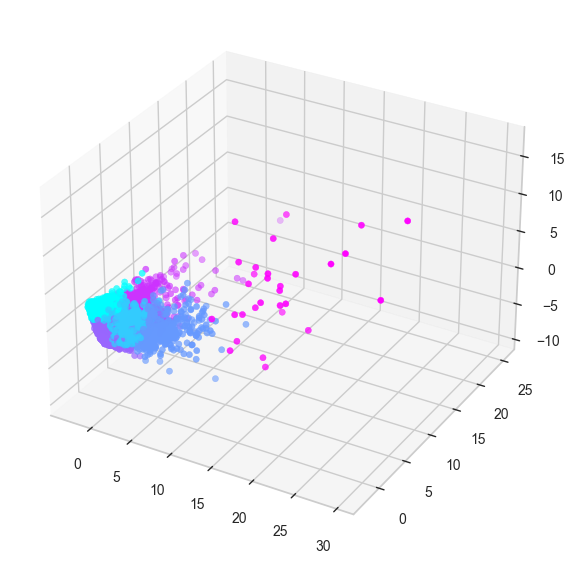

In [18]:
# Plot the data points in the 3-dimensional space with feature pca_1, pca_2 and pca_3, using the class information in kmeans_model.labels_
plt.figure(figsize=(12, 7))
ax = plt.subplot(projection="3d")
ax.scatter(pca3_df.pca_1, pca3_df.pca_2, pca3_df.pca_3, c=model.labels_, cmap="cool")
plt.show()

The plot above shows that the data is grouped OK. Each cluster contains elements from the dataset such that they form a closed cluster, meaning they do not overlap nor are not far from centroids.

In [19]:
# We test the two most important principal components 
no_components = 2
pca2 = PCA(n_components=no_components)

# Fit (i.e., construct the 2-dimensional PCA space) and transform (i.e., project the original data points into the 2-dimensional PCA space).
pca2_data = pca2.fit_transform(normal_data)

# Create a dataframe from the projected data points in 2-dimensional PCA space, namely "pca_1" and "pca_2"
pca2_df = pd.DataFrame(pca2_data, columns=["pca_1", "pca_2"])

In [20]:
pca2_df.head()

,pca_1,pca_2
0,-1.682222,-1.076461
1,-1.138294,2.506443
2,0.969689,-0.383459
3,-0.873628,0.043167
4,-1.599436,-0.688595


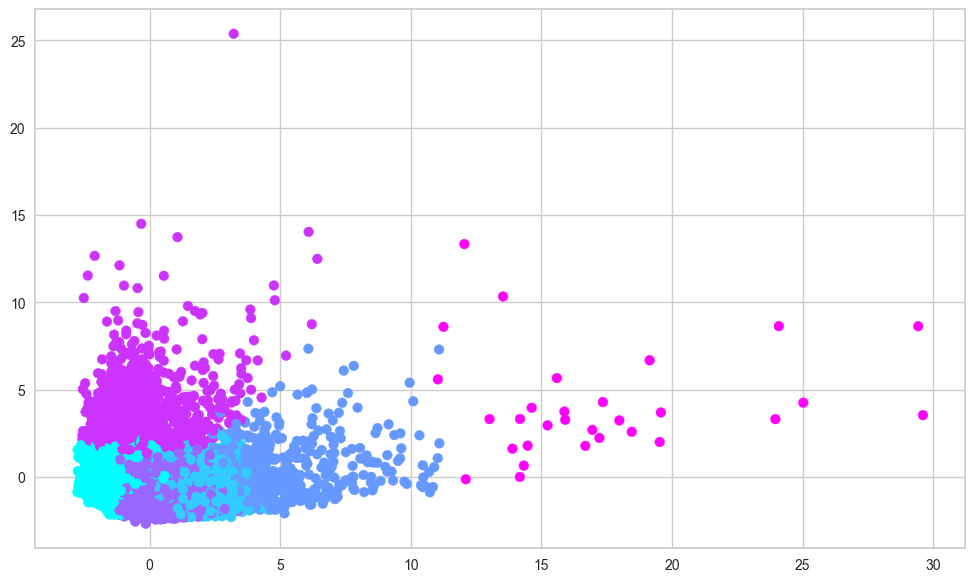

In [21]:
# Plot the data points in the 2-dimensional space with feature pca_1 and pca_2, using the class information in kmeans_model.labels_
plt.figure(figsize=(12, 7))
ax = plt.subplot()
ax.scatter(pca2_df.pca_1, pca2_df.pca_2, c=model.labels_, cmap="cool")
plt.show()

C:\Users\thomas\AppData\Local\Temp\ipykernel_27060\478098066.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(pca2_df.iloc[index].pca_1, pca2_df.iloc[index].pca_2, label=g, cmap="cool")     # Plot data points with label


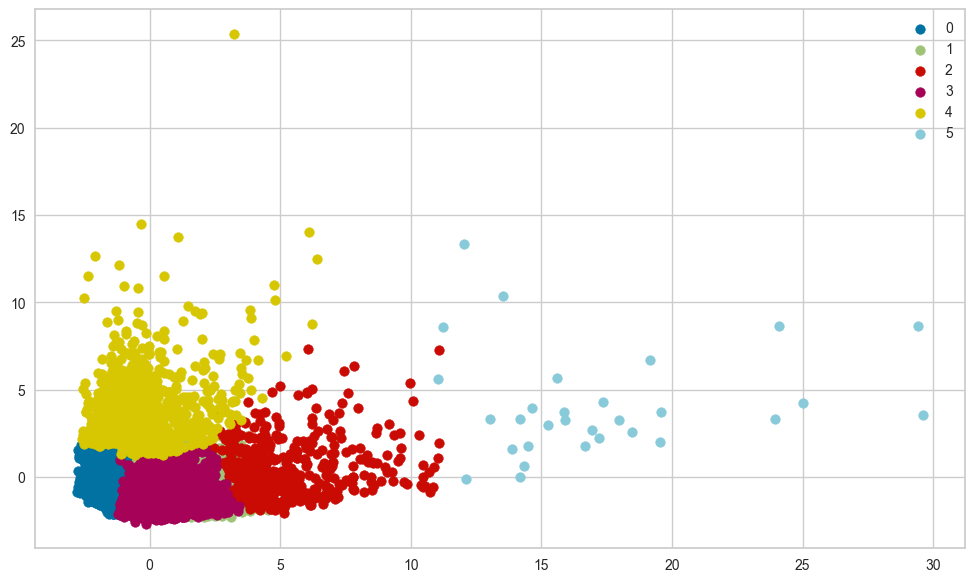

In [22]:
# Visualize the cluster with legend
import numpy as np
plt.figure(figsize=(12, 7))
ax = plt.subplot()

# List of labels
group = model.labels_

# Plot data samples in each label group: 0, 1 and 2.
for g in np.unique(group):
    index = np.where(group==g)     # Get all indices of label group g
    ax.scatter(pca2_df.iloc[index].pca_1, pca2_df.iloc[index].pca_2, label=g, cmap="cool")     # Plot data points with label
ax.legend()
plt.show()

In [23]:
#Now we will extract each cluster to variable with format "cluster_i"
for i in range(elbow_method.elbow_value_):
    name = "cluster_" + str(i)
    globals()[name] = np.where(model.labels_ == i)

#Print out a sample
df.iloc[cluster_3]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.0,0.666667,0.000000,0.583333,0.0,0,8,1800.0,1400.057770,2407.246035,0.000000,12
7,1823.652743,1.000000,436.20,0.00,436.20,0.0,1.000000,0.000000,1.000000,0.0,0,12,2300.0,679.065082,532.033990,0.000000,12
10,1293.124939,1.000000,920.12,0.00,920.12,0.0,1.000000,0.000000,1.000000,0.0,0,12,1200.0,1083.301007,2172.697765,0.000000,12
12,1516.928620,1.000000,3217.99,2500.23,717.76,0.0,1.000000,0.250000,0.916667,0.0,0,26,3000.0,608.263689,490.207013,0.250000,12
13,921.693369,1.000000,2137.93,419.96,1717.97,0.0,0.750000,0.166667,0.750000,0.0,0,26,7500.0,1655.891435,251.137986,0.083333,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8940,130.838554,1.000000,591.24,0.00,591.24,0.0,1.000000,0.000000,0.833333,0.0,0,6,1000.0,475.523262,82.771320,1.000000,6
8942,40.829749,1.000000,113.28,0.00,113.28,0.0,1.000000,0.000000,0.833333,0.0,0,6,1000.0,94.488828,86.283101,0.250000,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.0,1.000000,0.000000,0.833333,0.0,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.0,1.000000,0.000000,0.833333,0.0,0,6,1000.0,275.861322,864.206542,0.000000,6


### TSNE visualization

In [24]:
# Import TSNE library
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, random_state=256) # Initialize TSNE with the TSNE space dimension (n_components)
tsne_features = tsne.fit_transform(normal_data) # Project data (high dimension) to TSNE space (low dimension)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8950 samples in 0.001s...
[t-SNE] Computed neighbors for 8950 samples in 0.303s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8950
[t-SNE] Computed conditional probabilities for sample 2000 / 8950
[t-SNE] Computed conditional probabilities for sample 3000 / 8950
[t-SNE] Computed conditional probabilities for sample 4000 / 8950
[t-SNE] Computed conditional probabilities for sample 5000 / 8950
[t-SNE] Computed conditional probabilities for sample 6000 / 8950
[t-SNE] Computed conditional probabilities for sample 7000 / 8950
[t-SNE] Computed conditional probabilities for sample 8000 / 8950
[t-SNE] Computed conditional probabilities for sample 8950 / 8950
[t-SNE] Mean sigma: 0.427264
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.962936
[t-SNE] KL divergence after 1000 iterations: 1.501662


[Text(0.5, 1.0, 'Kmean clustering on 2d')]

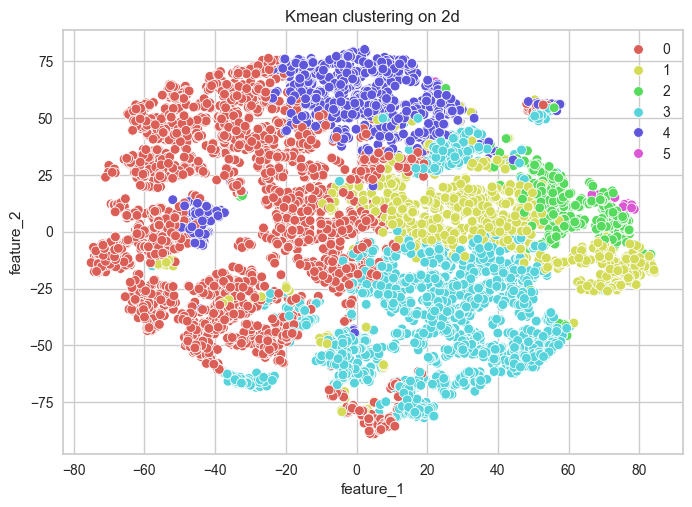

In [25]:

tsne_data = pd.DataFrame()
tsne_data["label"] = model.labels_
tsne_data["feature_1"] = tsne_features[:,0]
tsne_data["feature_2"] = tsne_features[:,1]

# Visualize the clusters
sns.scatterplot(x="feature_1", y="feature_2", hue=tsne_data.label.tolist(), palette=sns.color_palette("hls", 6),
                data=tsne_data).set(title="Kmean clustering on 2d") # Visualize tsne_data

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8950 samples in 0.001s...
[t-SNE] Computed neighbors for 8950 samples in 0.274s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8950
[t-SNE] Computed conditional probabilities for sample 2000 / 8950
[t-SNE] Computed conditional probabilities for sample 3000 / 8950
[t-SNE] Computed conditional probabilities for sample 4000 / 8950
[t-SNE] Computed conditional probabilities for sample 5000 / 8950
[t-SNE] Computed conditional probabilities for sample 6000 / 8950
[t-SNE] Computed conditional probabilities for sample 7000 / 8950
[t-SNE] Computed conditional probabilities for sample 8000 / 8950
[t-SNE] Computed conditional probabilities for sample 8950 / 8950
[t-SNE] Mean sigma: 0.427264
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.367416


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[t-SNE] KL divergence after 1000 iterations: 1.319125


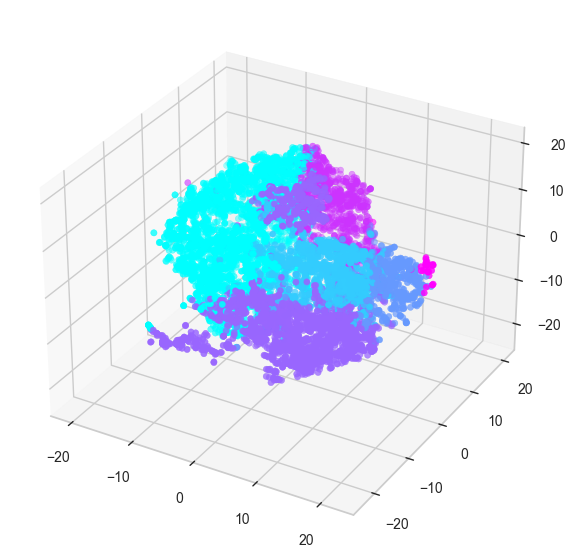

In [26]:
tsne_3d = TSNE(n_components=3, verbose=1, random_state=256) # Initialize TSNE with the TSNE space dimension (n_components)
tsne_features_3d = tsne_3d.fit_transform(normal_data)

# Create a data frame with TSNE features and data label
df2 = pd.DataFrame()
df2["label"] = model.labels_
df2["1d"] = tsne_features_3d[:,0]
df2["2d"] = tsne_features_3d[:,1]
df2["3d"] = tsne_features_3d[:,2]
# Visualize the clusters
plt.figure(figsize=(12, 7))
ax = plt.subplot(projection="3d")
ax.scatter(df2["1d"],df2["2d"], df2["3d"], c=df2.label, cmap="cool")
ax.legend()
plt.show()

### Save model using pickle

In [27]:
# Save model using pickle library
import pickle
file_name = "model.sav"                              # Path to save the model
pickle.dump(model, open(file_name, "wb"))     # Save the model to a pickle file

# Note: the kmeans_model is having three clusters.